<a href="https://colab.research.google.com/github/Venettov/Riveraruiz_GIS/blob/main/PS1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install geopandas==1.0.1
!pip install mapclassify


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 1.3 MB/s eta 0:00:00


# **TITLE**

### *Exploring Population Rates, Employment, and Demographic Data: A GIS Project in Puerto Rico*


#**DESCRIPTION**

### *The primary objective of this project is to analyze and compare population and employment rates across the various towns of Puerto Rico*

#**DATASET SOURCES**

### Population Density Data:

#### https://censo.estadisticas.pr/EstimadosPoblacionales

## Employment Data:

#### https://indicadores.pr/dataset/tasa-desempleo-municipio-area/resource/8de254b0-b769-4a4e-b145-9a6975369b91

## Demographic Data:

#### https://censo.estadisticas.pr/node/520

Puerto Rico has faced natural disasters, corruption, mismanagement by local government, and mass emigration that has resulted in a critical loss of professionals and has essentially reduced the island’s student population to levels I never imagined. I myself emigrated after finishing college in search of better job opportunities.

As indicated by the State Data Center of Puerto Rico’s website (https://censo.estadisticas.pr/), the population has been declining for decades and the pace has accelerated in recent years. The exodus, which includes a large portion of young people, has accelerated the aging of the population. I have even noticed this personally when I visit the island; my village is mostly occupied by people over 50 years old. As a direct consequence, the birth rate is also low. The government has also closed many schools due to the drop in student numbers and as an austerity measure in the face of the economic crisis.

To counteract the loss of population, Puerto Rico must adopt measures that shore up its economy, security, education and expand employment opportunities. Population data analysis presentation can be used to support tax reforms and enhance the island’s attractions. Data and its proper use can help to have a better Puerto Rico.



In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #visualization library
import geopandas as gpd #gis/maps library

import mapclassify

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe




In [4]:

# The shapefile informatition was downloaded from: https://data.humdata.org/dataset/cod-ab-pri?
# I could donwload the zile file directly from the source and get the same result (line below)
#! wget -q -O pr-counties.zip https://data.humdata.org/dataset/e71a08a7-8529-4964-9ad7-7319e6ec05f8/resource/d3b8f932-16cf-4ecb-89b8-c2611922fcb4/download/pri_adm_2019_shp.zip

# I saved the file on Google Drive and created the link below:
! wget -q -O pr-counties.zip https://drive.google.com/uc?id=14I-sv4Q-3oCtdNXerqPGJZ9QkG37b48C&export=download

zip_ref = zipfile.ZipFile('pr-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
prC0=gpd.read_file('original/pri_admbnda_adm1_2019.shp') #load the shapefile with gpd as prC
prC1=gpd.read_file('original/pri_admbndl_ALL_2019.shp') #load the shapefile with gpd as prC




In [6]:
#The file below is Población_total_en_Municipios_2020-2023.csv
#This file was downloaded from: https://censo.estadisticas.pr/EstimadosPoblacionales
! wget -q -O population.csv https://drive.google.com/uc?id=1RpLzrP8ZKVSW_jsuzzqd7oY-GWYBypuG&export=download
df_pop = pd.read_csv("population.csv")

#The file below is pr_unemployment_rates.csv
#This file was downloaded from: https://indicadores.pr/dataset/tasa-desempleo-municipio-area/resource/8de254b0-b769-4a4e-b145-9a6975369b91
! wget -q -O unem.csv https://drive.google.com/uc?id=1Ix9WCtGqJAHmptO6BdbD826lvKhKpPzE&export=download
df_unemployment = pd.read_csv("unem.csv")

#The file below is datos_municipales.csv
#This file was downloaded from: https://censo.estadisticas.pr/node/520
! wget -q -O gen.csv https://drive.google.com/uc?id=18Au9nBwdMdG6GJqR5jz3qly8Yf3IzfuJ&export=download
df_gen = pd.read_csv("gen.csv")


,0
ADM0_ES,object
ADM0_PCODE,object
ADM1_ES,object
ADM1_PCODE,object
area_sq_m,float64
area_sq_mi,float64
area_sq__1,float64
area_sq__2,float64
area_sq__3,float64
geometry,geometry


<Axes: >

Text(0.5, 413.2132562375006, 'longitude')

Text(20.097222222222214, 0.5, 'latitude')

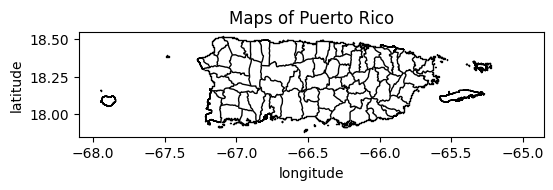

In [51]:
# The shape file contains geometry information on the limits of Puerto Rico and internal towns divisions
# I printed the information below and started exploring with it.

prC0.dtypes
#prC0.head(1)
#prC0.head()
#prC0.tail()
#prC0.shape
#prC0.columns
#prC0.explore()

fig1, ax = plt.subplots(1, figsize=(6,10))
prC1.plot(ax=ax,legend=False,cmap='YlOrRd',k=5,
         edgecolor='black',linewidth=1) #
ax.title.set_text("Maps of Puerto Rico")
ax.set_xlabel('''longitude''')
ax.set_ylabel('''latitude''')

#prC1.plot()

In [53]:

# Some towns include special characters that gagve me some trouble when merging the Shapefile wkth the CSV files.
# I created the structure below to include all those towns and create a new Shapefile qith the name of towns without special characters

# Define the words to search for and their replacements
replacements = {
    'Mayagüez': 'Mayaguez',
    'Canóvanas': 'Canovanas',
    'Comerío': 'Comerio',
    'Manatí': 'Manati',
    'San Sebastián': 'San Sebastian',
    'San Germán': 'San German',
    'Rincón': 'Rincon',
    'Juana Díaz': 'Juana Diaz',
    'Loíza': 'Juana Diaz',
    'Bayamón': 'Bayamon',
    'Río Grande': 'Rio Grande',
    'Las Marías': 'Las Marias',
    'Guánica': 'Las Marias'
}

# Replace the words in the specified column (e.g., 'name' column)
for old_word, new_word in replacements.items():
    prC0['ADM1_ES'] = prC0['ADM1_ES'].str.replace(old_word, new_word)

# Save the modified shapefile
prC0.to_file('merged_shapefile.shp')
prC0=gpd.read_file('merged_shapefile.shp')


shapefile = gpd.read_file('merged_shapefile.shp')
# Ensure the shapefile is in a projected CRS (e.g., UTM)
shapefile = shapefile.to_crs(epsg=3395)  # EPSG:3395 is World Mercator

# Calculate the area in square meters
shapefile['area_sq_m'] = shapefile.geometry.area

# Convert the area to square miles (1 square meter = 3.861e-7 square miles)
shapefile['area_sq_miles'] = shapefile['area_sq_m'] * 3.861e-7

# Print the area of the town
print(shapefile[['ADM1_ES', 'area_sq_miles']])
shapefile.to_file('modified_shapefile.shp')


         ADM1_ES  area_sq_miles
0         Añasco      43.744464
1       Adjuntas      74.815830
2         Aguada      34.404111
3      Aguadilla      40.783452
4   Aguas Buenas      34.158337
..           ...            ...
73     Vega Baja      51.868964
74       Vieques      58.501993
75      Villalba      40.766556
76       Yabucoa      61.697871
77         Yauco      75.672635

[78 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:709: RuntimeWarning: Value 113298275.200277925 of field area_sq_m of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:709: RuntimeWarning: Value 193773193.954806149 of field area_sq_m of feature 1 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:709: RuntimeWarning: Value 105629245.598025531 of field area_sq_m of feature 3 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:709: RuntimeWarning: Value 364671565.35518223 of field area_sq_m of feature 6 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:709: R

Reviewing what information is available in the CSV documents

In [37]:
# Below I'm exploring tha data contained inside the csv file with populatition data.
df_pop.columns


Index(['Geographic Area', 'Municipio', 'April 1, 2020 Estimates Base', '2020',
       '2021', '2022', '2023'],
      dtype='object')

In [38]:
# Below I'm exploring tha data contained inside the csv file with unemploymemnt data.
df_unemployment.columns


Index(['Municipio', '8/1/2020', '7/1/2020', '6/1/2020', '5/1/2020', '4/1/2020',
       '3/1/2020', '2/1/2020', '1/1/2020', '12/1/2019',
       ...
       '12/1/1990', '11/1/1990', '10/1/1990', '9/1/1990', '8/1/1990',
       '7/1/1990', '6/1/1990', '5/1/1990', '4/1/1990', '3/1/1990'],
      dtype='object', length=367)

In [39]:
# Below I'm exploring tha data contained inside the csv file with general populatition data.
df_gen.columns


Index(['Municipio', 'Año', 'Tasa de desempleo (por ciento)', 'Color',
       'Población de 65000 o más', 'Población ',
       'Tasa de participación laboral (por ciento)', 'Mediana de ingreso',
       'Población femenina (por ciento)',
       'Casados (por ciento de 15 años o más)',
       'Solteros (por ciento de  15 años o más)',
       'Población de 5-17 años (por ciento)',
       'Población de 5 años (por ciento)',
       'Mediana de valor de vivienda (miles de $)',
       'Viviendas alquiladas (por ciento)', 'Años de escolaridad (mediana)',
       'Promedio de ingreso familiar',
       'Familias bajo el nivel de pobreza (por ciento)',
       'Vivienda inadecuada (por ciento)', 'Población urbana (por ciento)'],
      dtype='object')

In [40]:
# Below I'm merging the general populatiton and the unemployment data using the town's name
df_pop_unem = pd.merge(df_pop, df_unemployment, on='Municipio')
df_pop_unem.head(78)


,Geographic Area,Municipio,"April 1, 2020 Estimates Base",2020,2021,2022,2023,8/1/2020,7/1/2020,6/1/2020,...,12/1/1990,11/1/1990,10/1/1990,9/1/1990,8/1/1990,7/1/1990,6/1/1990,5/1/1990,4/1/1990,3/1/1990
0,".Adjuntas Municipio, Puerto Rico",Adjuntas,"18,020","18,010","18,025","17,897","17,900",10.8,9.4,10.4,...,13.7,13.4,15.0,15.0,16.8,13.5,19.4,21.5,22.1,21.1
1,".Aguada Municipio, Puerto Rico",Aguada,"38,136","38,108","38,003","37,639","37,528",8.7,7.6,9.2,...,20.0,19.6,22.0,19.7,18.2,14.9,19.4,19.0,20.8,23.7
2,".Aguadilla Municipio, Puerto Rico",Aguadilla,"55,101","55,046","54,614","53,883","53,622",9.1,8.1,9.3,...,19.0,18.2,18.4,17.8,18.4,14.9,19.4,20.0,20.3,20.9
3,".Aguas Buenas Municipio, Puerto Rico",Aguas Buenas,"24,223","24,189","23,976","23,521","23,274",9.5,8.3,9.9,...,18.7,17.4,18.9,17.4,16.8,13.2,16.0,16.7,18.5,20.6
4,".Aibonito Municipio, Puerto Rico",Aibonito,"24,637","24,633","24,680","24,534","24,602",8.5,7.5,8.7,...,12.1,12.3,13.5,12.0,13.2,10.5,11.9,11.2,11.5,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,".Vega Baja Municipio, Puerto Rico",Vega Baja,"54,414","54,357","54,227","53,652","53,527",11.7,10.1,12.0,...,17.1,16.2,17.3,15.7,15.7,13.0,17.6,16.7,16.1,16.4
74,".Vieques Municipio, Puerto Rico",Vieques,"8,249","8,236","8,171","8,040","7,999",10.5,8.4,9.5,...,12.9,12.3,11.8,9.4,11.3,9.7,14.6,14.2,15.4,16.6
75,".Villalba Municipio, Puerto Rico",Villalba,"22,093","22,041","21,817","21,454","21,285",9.3,7.8,8.6,...,19.5,18.6,20.3,18.8,24.4,20.0,26.2,25.3,30.0,29.3
76,".Yabucoa Municipio, Puerto Rico",Yabucoa,"30,426","30,329","29,944","29,286","28,897",9.7,8.2,9.4,...,20.4,19.8,22.0,21.2,23.0,17.0,22.7,21.6,23.9,28.6


In [41]:
# Below I'm merging the general populatiton, unemployment data, and genal populatiton data using the town's name
df_pop_unem_gen = pd.merge(df_pop_unem, df_gen, on='Municipio')
df_pop_unem_gen.head(78)



,Geographic Area,Municipio,"April 1, 2020 Estimates Base",2020,2021,2022,2023,8/1/2020,7/1/2020,6/1/2020,...,Solteros (por ciento de 15 años o más),Población de 5-17 años (por ciento),Población de 5 años (por ciento),Mediana de valor de vivienda (miles de $),Viviendas alquiladas (por ciento),Años de escolaridad (mediana),Promedio de ingreso familiar,Familias bajo el nivel de pobreza (por ciento),Vivienda inadecuada (por ciento),Población urbana (por ciento)
0,".Adjuntas Municipio, Puerto Rico",Adjuntas,"18,020","18,010","18,025","17,897","17,900",10.8,9.4,10.4,...,27.6,24.7,7.6,57200,24.7,NaN,17560.70,61.7,NaN,57.8
1,".Aguada Municipio, Puerto Rico",Aguada,"38,136","38,108","38,003","37,639","37,528",8.7,7.6,9.2,...,27.8,22.1,7.7,54700,16.8,NaN,20601.12,55.6,NaN,100.0
2,".Aguadilla Municipio, Puerto Rico",Aguadilla,"55,101","55,046","54,614","53,883","53,622",9.1,8.1,9.3,...,27.8,20.1,7.3,67100,29.8,NaN,21888.45,51.5,NaN,100.0
3,".Aguas Buenas Municipio, Puerto Rico",Aguas Buenas,"24,223","24,189","23,976","23,521","23,274",9.5,8.3,9.9,...,28.1,21.5,7.9,67300,23.5,NaN,22988.54,49.8,NaN,94.1
4,".Aibonito Municipio, Puerto Rico",Aibonito,"24,637","24,633","24,680","24,534","24,602",8.5,7.5,8.7,...,28.0,23.1,7.4,73700,22.9,NaN,22861.80,48.5,NaN,87.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,".Vega Baja Municipio, Puerto Rico",Vega Baja,"54,414","54,357","54,227","53,652","53,527",11.7,10.1,12.0,...,26.3,22.0,8.4,72100,17.8,NaN,24789.24,47.1,NaN,96.2
74,".Vieques Municipio, Puerto Rico",Vieques,"8,249","8,236","8,171","8,040","7,999",10.5,8.4,9.5,...,26.8,21.9,7.8,60900,15.0,NaN,17520.87,60.6,NaN,88.5
75,".Villalba Municipio, Puerto Rico",Villalba,"22,093","22,041","21,817","21,454","21,285",9.3,7.8,8.6,...,30.4,25.5,9.0,50000,17.5,NaN,18827.26,57.3,NaN,83.7
76,".Yabucoa Municipio, Puerto Rico",Yabucoa,"30,426","30,329","29,944","29,286","28,897",9.7,8.2,9.4,...,30.2,21.9,8.0,58800,16.0,NaN,21732.44,51.0,NaN,94.9


In [42]:
# Merge the shapefile with all the data on different column names using the town's name
merged_data = prC0.merge(df_pop_unem_gen, left_on='ADM1_ES', right_on='Municipio')


In [43]:
# Printing the merged data to verify everything is there!
merged_data

#The structure below contains all the merged data from the various files.
#The merged information includes population, unermployment rates, income data, etc.


,ADM0_ES,ADM0_PCODE,ADM1_ES,ADM1_PCODE,geometry,Geographic Area,Municipio,"April 1, 2020 Estimates Base",2020,2021,...,Solteros (por ciento de 15 años o más),Población de 5-17 años (por ciento),Población de 5 años (por ciento),Mediana de valor de vivienda (miles de $),Viviendas alquiladas (por ciento),Años de escolaridad (mediana),Promedio de ingreso familiar,Familias bajo el nivel de pobreza (por ciento),Vivienda inadecuada (por ciento),Población urbana (por ciento)
0,Puerto Rico,PR,Añasco,PR06,"POLYGON ((-67.18903 18.26622, -67.18903 18.266...",".Añasco Municipio, Puerto Rico",Añasco,"25,596","25,570","25,414",...,26.7,20.8,7.5,59700,17.0,NaN,20958.82,49.3,NaN,89.6
1,Puerto Rico,PR,Adjuntas,PR01,"POLYGON ((-66.79774 18.13365, -66.80194 18.139...",".Adjuntas Municipio, Puerto Rico",Adjuntas,"18,020","18,010","18,025",...,27.6,24.7,7.6,57200,24.7,NaN,17560.70,61.7,NaN,57.8
2,Puerto Rico,PR,Aguada,PR02,"POLYGON ((-67.13012 18.31805, -67.13705 18.316...",".Aguada Municipio, Puerto Rico",Aguada,"38,136","38,108","38,003",...,27.8,22.1,7.7,54700,16.8,NaN,20601.12,55.6,NaN,100.0
3,Puerto Rico,PR,Aguadilla,PR03,"POLYGON ((-67.05623 18.46092, -67.07426 18.456...",".Aguadilla Municipio, Puerto Rico",Aguadilla,"55,101","55,046","54,614",...,27.8,20.1,7.3,67100,29.8,NaN,21888.45,51.5,NaN,100.0
4,Puerto Rico,PR,Aguas Buenas,PR04,"POLYGON ((-66.16881 18.22423, -66.17622 18.229...",".Aguas Buenas Municipio, Puerto Rico",Aguas Buenas,"24,223","24,189","23,976",...,28.1,21.5,7.9,67300,23.5,NaN,22988.54,49.8,NaN,94.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Puerto Rico,PR,Vega Baja,PR74,"POLYGON ((-66.34959 18.48347, -66.34956 18.479...",".Vega Baja Municipio, Puerto Rico",Vega Baja,"54,414","54,357","54,227",...,26.3,22.0,8.4,72100,17.8,NaN,24789.24,47.1,NaN,96.2
74,Puerto Rico,PR,Vieques,PR75,"MULTIPOLYGON (((-65.43347 18.09153, -65.43819 ...",".Vieques Municipio, Puerto Rico",Vieques,"8,249","8,236","8,171",...,26.8,21.9,7.8,60900,15.0,NaN,17520.87,60.6,NaN,88.5
75,Puerto Rico,PR,Villalba,PR76,"POLYGON ((-66.43031 18.08219, -66.43401 18.083...",".Villalba Municipio, Puerto Rico",Villalba,"22,093","22,041","21,817",...,30.4,25.5,9.0,50000,17.5,NaN,18827.26,57.3,NaN,83.7
76,Puerto Rico,PR,Yabucoa,PR77,"POLYGON ((-65.98853 18.05886, -65.99869 18.060...",".Yabucoa Municipio, Puerto Rico",Yabucoa,"30,426","30,329","29,944",...,30.2,21.9,8.0,58800,16.0,NaN,21732.44,51.0,NaN,94.9


<Axes: >

Text(0.5, 1076.9498072604108, 'longitude')

Text(141.22222222222223, 0.5, 'latitude')

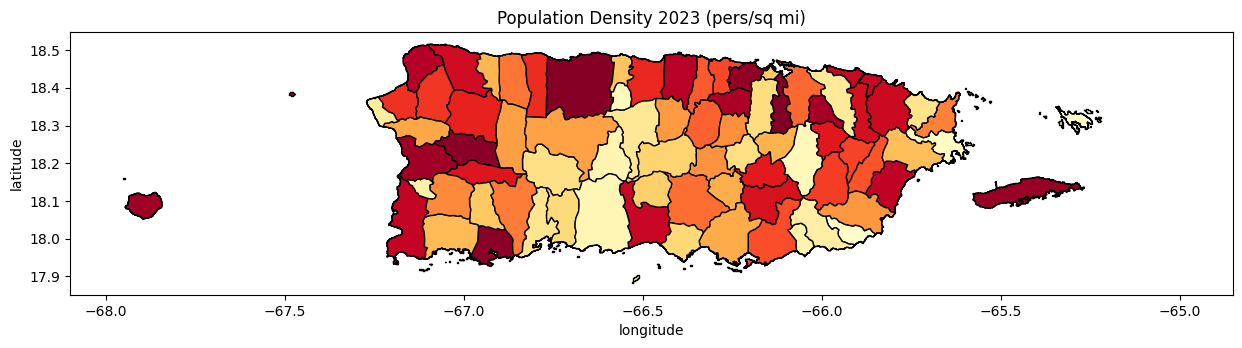

In [26]:
# The map below displays the population density for all 78 towns in Puerto Rico
fig, ax = plt.subplots(1, figsize=(15,25))

merged_data.plot(ax=ax,column='2023', legend=False,cmap='YlOrRd',k=5,
         edgecolor='black',linewidth=1) #

#prC0.plot(ax=ax,column='ADM1_ES',legend=True,cmap='YlOrRd',k=5,
#         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
#        'loc':'best','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

ax.title.set_text("Population Density 2023 (pers/sq mi)")
ax.set_xlabel('''longitude''')
ax.set_ylabel('''latitude''')



<Axes: >

Text(0.5, 1076.9498072604108, 'longitude')

Text(141.22222222222223, 0.5, 'latitude')

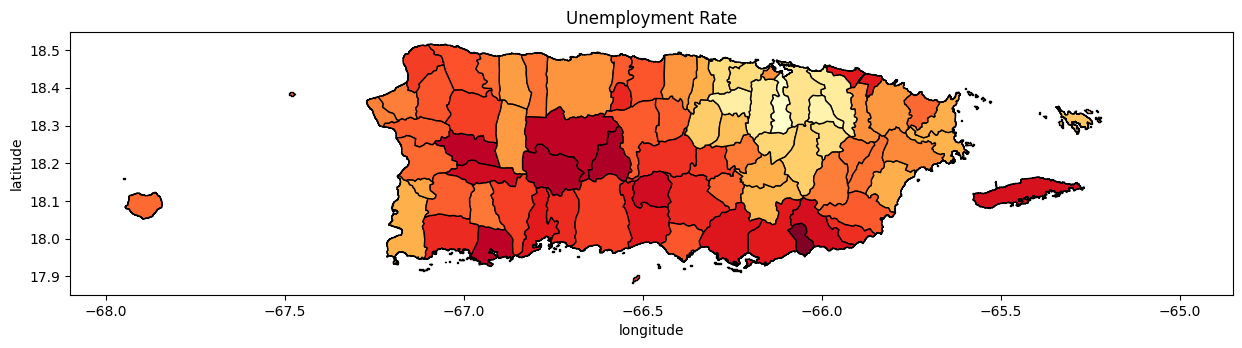

In [27]:
# The map below displays unemployment rartes for all 78 towns in Puerto Rico
fig, ax = plt.subplots(1, figsize=(15,25))

merged_data.plot(ax=ax,column='Tasa de desempleo (por ciento)', legend=False,cmap='YlOrRd',k=5,
         edgecolor='black',linewidth=1) #

#prC0.plot(ax=ax,column='ADM1_ES',legend=True,cmap='YlOrRd',k=5,
#         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
#        'loc':'best','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

ax.title.set_text("Unemployment Rate")
ax.set_xlabel('''longitude''')
ax.set_ylabel('''latitude''')

<Axes: >

Text(0.5, 1076.9498072604108, 'longitude')

Text(141.22222222222223, 0.5, 'latitude')

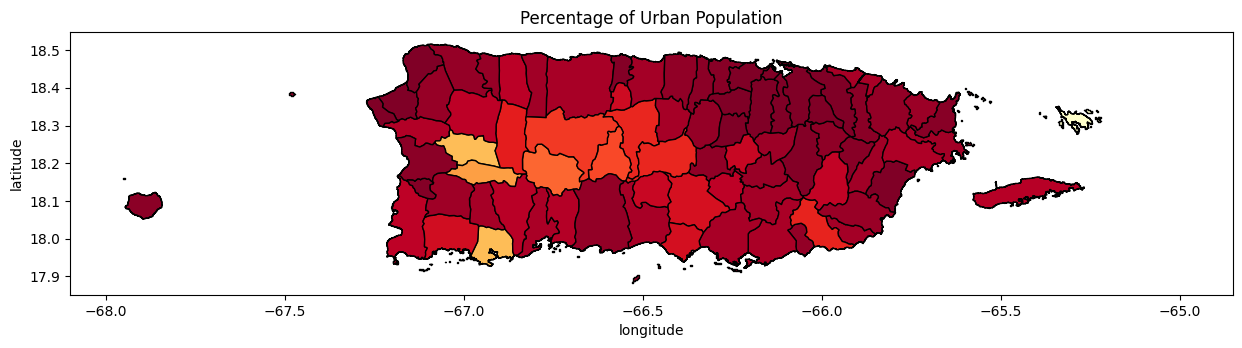

In [28]:
# The map below displays urban populatiton percentages for all 78 towns in Puerto Rico

fig, ax = plt.subplots(1, figsize=(15,25))

merged_data.plot(ax=ax,column='Población urbana (por ciento)', legend=False,cmap='YlOrRd',k=5,
         edgecolor='black',linewidth=1) #

#prC0.plot(ax=ax,column='ADM1_ES',legend=True,cmap='YlOrRd',k=5,
#         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
#        'loc':'best','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

ax.title.set_text("Percentage of Urban Population")
ax.set_xlabel('''longitude''')
ax.set_ylabel('''latitude''')

<Axes: >

Text(0.5, 1076.9498072604108, 'longitude')

Text(141.22222222222223, 0.5, 'latitude')

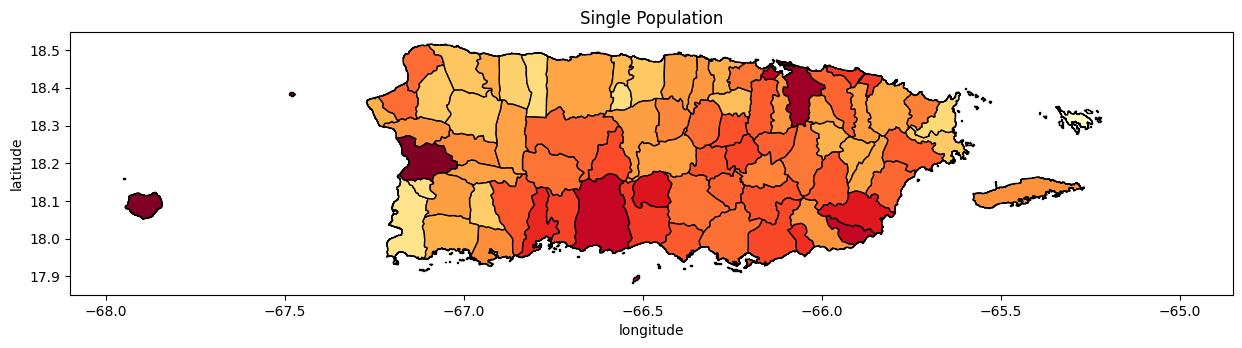

In [29]:
# The map below displays single populatiton percentages for all 78 towns in Puerto Rico

fig, ax = plt.subplots(1, figsize=(15,25))

merged_data.plot(ax=ax,column='Solteros (por ciento de  15 años o más)', legend=False,cmap='YlOrRd',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'best','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

#prC0.plot(ax=ax,column='ADM1_ES',legend=True,cmap='YlOrRd',k=5,
#         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
#        'loc':'best','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

ax.title.set_text("Single Population")
ax.set_xlabel('''longitude''')
ax.set_ylabel('''latitude''')


<Axes: >

Text(0.5, 1076.9498072604108, 'longitude')

Text(141.22222222222223, 0.5, 'latitude')

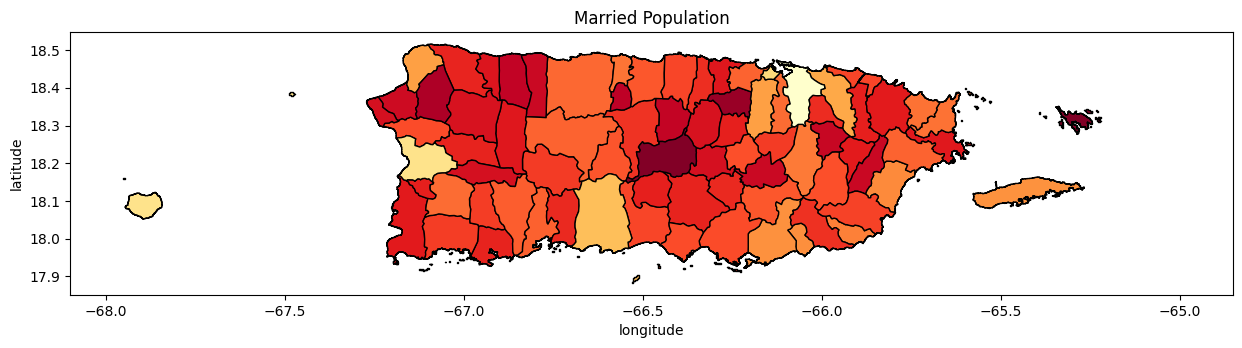

In [31]:
# The map below displays married populatiton percentages for all 78 towns in Puerto Rico
fig, ax = plt.subplots(1, figsize=(15,25))

merged_data.plot(ax=ax,column='Casados (por ciento de 15 años o más)', legend=False,cmap='YlOrRd',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'best','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

#prC0.plot(ax=ax,column='ADM1_ES',legend=True,cmap='YlOrRd',k=5,
#         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
#        'loc':'best','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #

ax.title.set_text("Married Population")
ax.set_xlabel('''longitude''')
ax.set_ylabel('''latitude''')
